In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [8]:
df= pd.read_csv('telco_train.csv')

In [9]:
#1.a
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#1.b
df.shape

#There are 3087 rows and 15 columns

(3087, 15)

In [11]:
#2
df['Churn'].isna().sum()

#There are 4 null values in the outcome variable

4

In [6]:
#3
df= df.dropna(axis=0, subset=['Churn'])
df['Churn'].value_counts()

#0 has 2253 instances
#1 has 830 instances

0.0    2253
1.0     830
Name: Churn, dtype: int64

In [14]:
df['Churn'].isna().any()

True

In [15]:
df['Churn'].isna().sum()

4

In [19]:
df['Churn'].dropna(inplace=True)

In [20]:
df['Churn'].isna().any()

True

In [108]:
#4 
print('Mean of tenure ', df['tenure'].mean())
print('Median of tenure ', df['tenure'].median())

Mean of tenure  32.108336036328254
Median of tenure  29.0


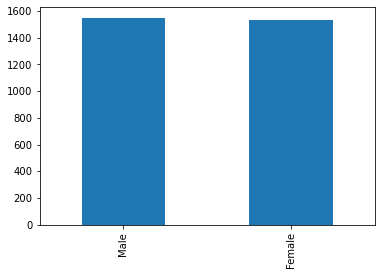

In [103]:
#5
df['gender'].value_counts().plot(kind='bar')

#Customers are almost equally distributed among the gender


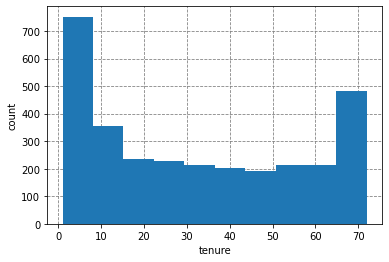

In [59]:
#6
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.hist(df.tenure)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('tenure')
ax.set_ylabel('count')
plt.show()

In [54]:
#7
df["Churn"] =df["Churn"].astype('category')


In [55]:
#7
df.info()

#As we can see Churn datatype is category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        3087 non-null   int64   
 1   gender            3087 non-null   object  
 2   SeniorCitizen     3087 non-null   int64   
 3   Partner           3087 non-null   int64   
 4   Dependents        3087 non-null   int64   
 5   tenure            3087 non-null   int64   
 6   PhoneService      3087 non-null   int64   
 7   MultipleLines     3087 non-null   int64   
 8   InternetService   3087 non-null   object  
 9   Contract          3087 non-null   object  
 10  PaperlessBilling  3087 non-null   int64   
 11  PaymentMethod     3087 non-null   object  
 12  MonthlyCharges    3087 non-null   float64 
 13  TotalCharges      3087 non-null   float64 
 14  Churn             3083 non-null   category
dtypes: category(1), float64(2), int64(8), object(4)
memory usage: 340.9+ KB


In [72]:
#8

df.groupby(['SeniorCitizen', 'gender'], as_index=False)['TotalCharges'].mean()
#Ratio = 2680.151867/2582.106883 = 1.037971

,SeniorCitizen,gender,TotalCharges
0,0,Female,2142.141570
1,0,Male,2179.248247
2,1,Female,2582.106883
3,1,Male,2680.151867


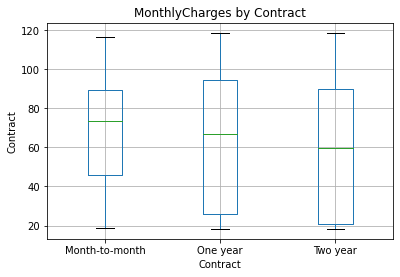

In [34]:
#9
ax = df.boxplot(column='MonthlyCharges', by='Contract')
ax.set_ylabel('MonthlyCharges')
ax.set_ylabel('Contract')
plt.suptitle('')  # Suppress the titles
plt.title('MonthlyCharges by Contract')
plt.show()

In [112]:
#10.
df = pd.get_dummies(data=df, drop_first = True, columns=['gender', 'InternetService', 'PaymentMethod','Contract'])

#It created the dummy variables for 'gender', 'InternetService', 'PaymentMethod','Contract' and for each dummy variable it 
#the first dummy variable like for gender it created gender_male and gender_female, it droped gender_female, because if the customer 
#is male, it is obvious that customer is not female.

In [46]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,1,0,0,0,3,1,0,0,19.85,63.75,1.0,0,0,1,0,0,1,0,0
1,2,0,0,0,68,1,1,0,110.25,7279.35,0.0,0,1,0,1,0,0,0,1
2,3,0,1,1,25,1,0,1,90.40,2178.60,1.0,1,1,0,0,1,0,1,0
3,4,0,1,0,24,1,1,1,58.35,1346.90,0.0,1,0,0,0,1,0,1,0
4,5,1,0,0,49,1,1,0,101.55,5070.40,0.0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,3086,0,0,0,2,1,0,0,20.45,34.80,0.0,0,0,1,0,0,1,1,0
3083,3087,0,1,1,12,1,1,1,84.50,916.90,1.0,0,1,0,0,1,0,0,0
3084,3088,1,1,0,45,1,1,0,24.70,1174.35,0.0,1,0,1,1,0,0,1,0
3085,3089,0,0,1,9,1,0,0,55.35,449.75,1.0,1,0,0,0,1,0,0,0


In [58]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [119]:
#11
excludeColumns = ('customerID','Churn')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'Churn'

In [120]:
print(predictors)
print(outcome)

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'InternetService_Fiber_optic', 'InternetService_No', 'PaymentMethod_Credit_card_(automatic)', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 'Contract_One_year', 'Contract_Two_year']
Churn


### Decision Tree Model

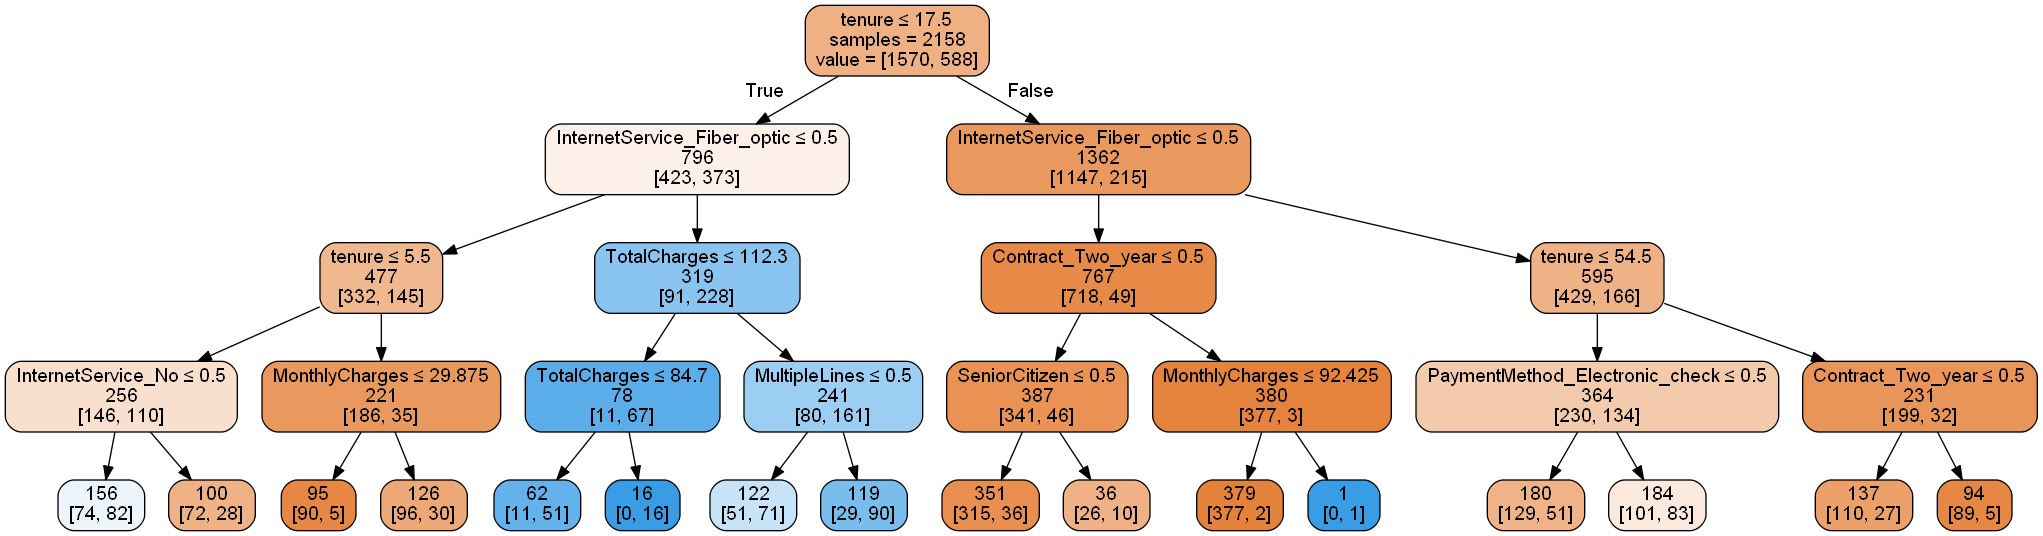

In [133]:
#12

X=df[predictors]
y=df[outcome]

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1, )

fullClassTree = DecisionTreeClassifier(max_depth=4)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)



In [134]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7952)

       Prediction
Actual    0    1
     0 1405  165
     1  277  311
Confusion Matrix (Accuracy 0.7903)

       Prediction
Actual   0   1
     0 588  95
     1  99 143


In [135]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def summary_statistics(clf,train_X, valid_X, train_y, valid_y):
    prediction_train=clf.predict(train_X)
    prediction_valid=clf.predict(valid_X)
    
    
    # accuracy of model for both training set and validation set
    print('Accuracy on train is', accuracy_score(train_y,prediction_train))
    print('Precision score on train is', precision_score(train_y,prediction_train))
    print('Recall score on train is', recall_score(train_y,prediction_train))
    print('F1 score on train is', f1_score(train_y,prediction_train))
    print(classificationSummary(train_y,prediction_train))
    print('\n')    
    print('Accuracy on validation is', accuracy_score(valid_y,prediction_valid))
    print('Precision score on validation is', precision_score(valid_y,prediction_valid))
    print('Recall score on validation is', recall_score(valid_y,prediction_valid))
    print('F1 score on validation is', f1_score(valid_y,prediction_valid))
    print(classificationSummary(valid_y,prediction_valid))
    
    
summary_statistics(fullClassTree,train_X, valid_X, train_y, valid_y)
    

Accuracy on train is 0.7951807228915663
Precision score on train is 0.6533613445378151
Recall score on train is 0.5289115646258503
F1 score on train is 0.5845864661654135
Confusion Matrix (Accuracy 0.7952)

       Prediction
Actual    0    1
     0 1405  165
     1  277  311
None


Accuracy on validation is 0.7902702702702703
Precision score on validation is 0.6008403361344538
Recall score on validation is 0.5909090909090909
F1 score on validation is 0.5958333333333333
Confusion Matrix (Accuracy 0.7903)

       Prediction
Actual   0   1
     0 588  95
     1  99 143
None


In [ ]:
#13.
Precision score on validation is 0.6008403361344538
Recall score on validation is 0.5909090909090909

In [ ]:
#14
F1 score on validation is 0.5958333333333333


                                  feature  importance
1                                 Partner    0.000000
2                              Dependents    0.000000
14             PaymentMethod_Mailed_check    0.000000
4                            PhoneService    0.000000
6                        PaperlessBilling    0.000000
12  PaymentMethod_Credit_card_(automatic)    0.000000
15                      Contract_One_year    0.000000
9                             gender_Male    0.000000
0                           SeniorCitizen    0.007685
5                           MultipleLines    0.014037
8                            TotalCharges    0.019538
13         PaymentMethod_Electronic_check    0.019632
7                          MonthlyCharges    0.021850
16                      Contract_Two_year    0.026951
11                     InternetService_No    0.028191
10            InternetService_Fiber_optic    0.366139
3                                  tenure    0.495976


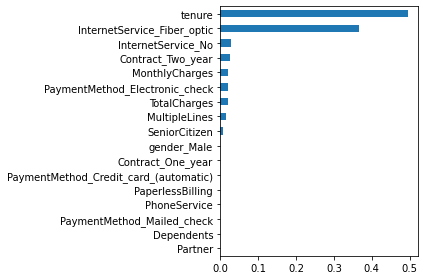

In [127]:
#15
plot_df = pd.DataFrame({'feature' : train_X.columns, 'importance':fullClassTree.feature_importances_})
plot_df = plot_df.sort_values('importance')
print(plot_df)
ax=plot_df.plot(kind='barh',x='feature',legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:

15. most importnat vairable = tenure and InternetService_Fiber_optic    


### Logistic Regression Model

In [130]:
16.

#build the logistic regression model logit_reg
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba.metric import AIC_score

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear',random_state=1)
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))


intercept  -0.28701772429137673
       SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
coeff       0.273528  0.082631   -0.194911 -0.056027     -0.301827   

       MultipleLines  PaperlessBilling  MonthlyCharges  TotalCharges  \
coeff       0.226245          0.232488        0.001598      0.000224   

       gender_Male  InternetService_Fiber_optic  InternetService_No  \
coeff     -0.06646                     0.877399           -0.578941   

       PaymentMethod_Credit_card_(automatic)  PaymentMethod_Electronic_check  \
coeff                              -0.200015                         0.38121   

       PaymentMethod_Mailed_check  Contract_One_year  Contract_Two_year  
coeff                   -0.066161          -0.405511          -1.532878  

AIC 1241.7840420998066


In [131]:
#17. 
prediction_train = logit_reg.predict(train_X)
prediction_valid = logit_reg.predict(valid_X)
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.7970342910101946
Accuracy on test is: 0.7848648648648648


In [132]:
#17
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def summary_statistics(clf,train_X, valid_X, train_y, valid_y):
    prediction_train=clf.predict(train_X)
    prediction_valid=clf.predict(valid_X)
    
    
    # accuracy of model for both training set and validation set
    print('Accuracy on train is', accuracy_score(train_y,prediction_train))
    print('Precision score on train is', precision_score(train_y,prediction_train))
    print('Recall score on train is', recall_score(train_y,prediction_train))
    print('F1 score on train is', f1_score(train_y,prediction_train))
    print(classificationSummary(train_y,prediction_train))
    print('\n')    
    print('Accuracy on validation is', accuracy_score(valid_y,prediction_valid))
    print('Precision score on validation is', precision_score(valid_y,prediction_valid))
    print('Recall score on validation is', recall_score(valid_y,prediction_valid))
    print('F1 score on validation is', f1_score(valid_y,prediction_valid))
    print(classificationSummary(valid_y,prediction_valid))
    
    

summary_statistics(logit_reg,train_X, valid_X, train_y, valid_y)

Accuracy on train is 0.7970342910101946
Precision score on train is 0.665929203539823
Recall score on train is 0.5119047619047619
F1 score on train is 0.5788461538461538
Confusion Matrix (Accuracy 0.7970)

       Prediction
Actual    0    1
     0 1419  151
     1  287  301
None


Accuracy on validation is 0.7848648648648648
Precision score on validation is 0.5964125560538116
Recall score on validation is 0.5495867768595041
F1 score on validation is 0.572043010752688
Confusion Matrix (Accuracy 0.7849)

       Prediction
Actual   0   1
     0 593  90
     1 109 133
None


In [ ]:
17. 
Precision score on validation is 0.5964125560538116
Recall score on validation is 0.5495867768595041

In [ ]:
18.
F1 score on validation is 0.572043010752688

In [ ]:
# 19. Decision tree is best fit model
